# 探索的データ解析(EDA)

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
train_raw = pd.read_csv('../data/raw//train.csv') #学習データ
test_raw = pd.read_csv('../data/raw/test.csv') #テストデータ
print('The size of the train data:' + str(train_raw.shape))
print('The size of the test data:' + str(test_raw.shape))

The size of the train data:(891, 12)
The size of the test data:(418, 11)


In [17]:
train_mid = train_raw.copy()
test_mid = test_raw.copy()
train_mid['train_or_test'] = 'train' #学習データフラグ
test_mid['train_or_test'] = 'test' #テストデータフラグ
test_mid['Survived'] = 9 #テストにSurvivedカラムを仮置き

alldata = pd.concat(
    [
        train_mid,
        test_mid
    ],
    sort=False,
    axis=0
).reset_index(drop=True)

## 生存率のベースライン(頻度)

In [18]:
# 生存率のベースライン
train_raw['Survived'].mean() #学習データにおける生存率

0.3838383838383838

## 説明変数別分析

### Pclass

In [7]:
# Pclass別の生存率
train_raw['Survived'].groupby(train_raw['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

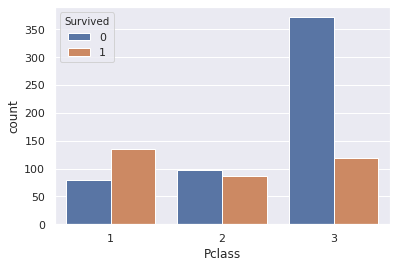

In [10]:
# Pclass別の生存数カウント
sns.countplot(train_raw['Pclass'], hue=train_raw['Survived'])

In [19]:
# Pclassの分布
pd.crosstab(alldata['Pclass'],alldata['train_or_test'],normalize='columns')

train_or_test,test,train
Pclass,,
1,0.255981,0.242424
2,0.222488,0.206510
3,0.521531,0.551066


### Name

In [21]:
# Nameの確認
train_raw['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [24]:
# 敬称(honorific)を抽出
train_raw['honorific'] = train_raw['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
train_raw['honorific'].value_counts() #敬称別のレコード数

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
the Countess      1
Lady              1
Jonkheer          1
Mme               1
Capt              1
Ms                1
Don               1
Sir               1
Name: honorific, dtype: int64

In [27]:
# テストデータの敬称(honorific)を抽出
alldata['honorific'] = alldata['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
pd.crosstab(alldata['honorific'],alldata['train_or_test']) #敬称別のレコード数

train_or_test,test,train
honorific,,
Capt,0,1
Col,2,2
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,0,1
Major,0,2
Master,21,40


In [28]:
# 学習データにしか現れない敬称を除外
only_train_honorific = ['Capt','Don','Jonkheer','Lady','Major','Mile','Mme','Sir','the Countess']
train_omit1 = train_raw[~train_raw['honorific'].isin(only_train_honorific) ].reset_index(drop=True)
# 敬称別の生存率とレコード数
train_omit1['Survived'].groupby(train_omit1['honorific']).agg(['mean','count'])

,mean,count
honorific,,
Col,0.500000,2
Dr,0.428571,7
Master,0.575000,40
Miss,0.697802,182
Mlle,1.000000,2
Mr,0.156673,517
Mrs,0.792000,125
Ms,1.000000,1
Rev,0.000000,6


In [29]:
train_omit1['honorific'].replace(['Col','Dr', 'Rev'], 'Rare',inplace=True) #少数派の敬称を統合
train_omit1['honorific'].replace('Mlle', 'Miss',inplace=True) #Missに統合
train_omit1['honorific'].replace('Ms', 'Miss',inplace=True) #Missに統合
# 敬称別の生存率
train_omit1['Survived'].groupby(train_omit1['honorific']).agg(['mean','count'])

,mean,count
honorific,,
Master,0.575000,40
Miss,0.702703,185
Mr,0.156673,517
Mrs,0.792000,125
Rare,0.266667,15


### Fare

# Fareの分布
sns.distplot(train_raw[train_raw['Survived']==1]['Fare'],kde=False,rug=False,bins=10,label='Survived')
sns.distplot(train_raw[train_raw['Survived']==0]['Fare'],kde=False,rug=False,bins=10,label='Death')
plt.legend()

In [33]:
print("Skewness of Fare:", train_raw['Fare'].skew()) #Fareの歪度

Skewness of Fare: 4.787316519674893


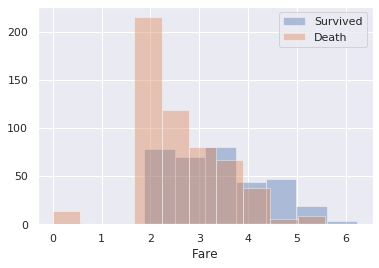

In [34]:
# 分布が歪んでいるためFareを対数変換して再度分布を確認
sns.distplot(np.log1p(train_raw[train_raw['Survived']==1]['Fare']),kde=False,rug=False,bins=10,label='Survived')
sns.distplot(np.log1p(train_raw[train_raw['Survived']==0]['Fare']),kde=False,rug=False,bins=10,label='Death')
plt.legend()

### Age

In [36]:
# Ageの欠損有無による生存率差
train_raw['Survived'].groupby(train_raw['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

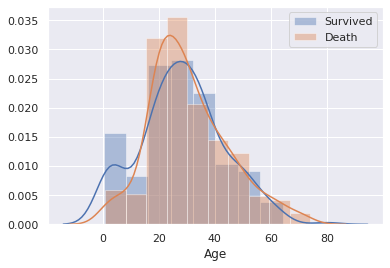

In [37]:
# Ageの欠損を除外
train_age_omit = train_raw.dropna(subset=['Age'])
# Ageの分布
sns.distplot(train_age_omit[train_age_omit['Survived']==1]['Age'],kde=True,rug=False,bins=10,label='Survived') #生存者の分布
sns.distplot(train_age_omit[train_age_omit['Survived']==0]['Age'],kde=True,rug=False,bins=10,label='Death') #死者の分布
plt.legend()

### FamilySize(Parch+Sibsp+1)

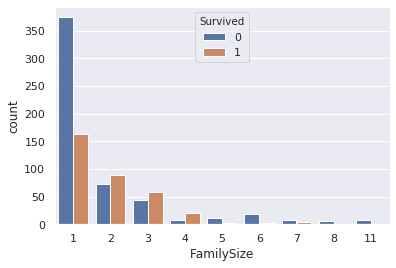

In [39]:
# 家族数 = Parch + SibSp + 1
train_raw['FamilySize'] = train_raw['Parch'] + train_raw['SibSp'] + 1 #学習データ
alldata['FamilySize'] = alldata['Parch'] + alldata['SibSp'] + 1 #ALLデータ
# 家族数ごとの分布を確認
sns.countplot(train_raw['FamilySize'],hue=train_raw['Survived'])

In [40]:
# FamilySizeを離散化
train_raw['FamilySize_bin'] = 'big'
train_raw.loc[train_raw['FamilySize']==1,'FamilySize_bin'] = 'alone'
train_raw.loc[(train_raw['FamilySize']>=2) & (train_raw['FamilySize']<=4),'FamilySize_bin'] = 'small'
train_raw.loc[(train_raw['FamilySize']>=5) & (train_raw['FamilySize']<=7),'FamilySize_bin'] = 'mediam'
# FamilySizeを離散化したときの生存率
train_raw['Survived'].groupby(train_raw['FamilySize_bin']).mean()

FamilySize_bin
alone     0.303538
big       0.000000
mediam    0.204082
small     0.578767
Name: Survived, dtype: float64

### Cabin

In [41]:
# Cabinの頭文字
train_raw['Cabin_ini'] = train_raw['Cabin'].map(lambda x:str(x)[0])
alldata['Cabin_ini'] = alldata['Cabin'].map(lambda x:str(x)[0])
# Cabinの頭文字別の生存率とレコード数
train_raw['Survived'].groupby(train_raw['Cabin_ini']).agg(['mean','count'])

,mean,count
Cabin_ini,,
A,0.466667,15
B,0.744681,47
C,0.593220,59
D,0.757576,33
E,0.750000,32
F,0.615385,13
G,0.500000,4
T,0.000000,1
n,0.299854,687


In [43]:
# Cabinの頭文字別のカウント数
pd.crosstab(alldata['Cabin_ini'],alldata['train_or_test'])

train_or_test,test,train
Cabin_ini,,
A,7,15
B,18,47
C,35,59
D,13,33
E,9,32
F,8,13
G,1,4
T,0,1
n,327,687


### Ticket

In [44]:
train_raw['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [45]:
train_raw['Survived'].groupby(train_raw['Ticket'].map(lambda x: str(x)[0])).agg(['mean','count'])

,mean,count
Ticket,,
1,0.630137,146
2,0.464481,183
3,0.239203,301
4,0.200000,10
5,0.000000,3
6,0.166667,6
7,0.111111,9
8,0.000000,2
9,1.000000,1


In [46]:
# 学習データとテストデータの分布を確認
pd.crosstab(alldata['Ticket'].map(lambda x: str(x)[0]),alldata['train_or_test'])

train_or_test,test,train
Ticket,,
1,64,146
2,95,183
3,128,301
4,1,10
5,0,3
6,3,6
7,4,9
8,0,2
9,1,1


Text(0.5, 1.0, 'frequency of ticket')

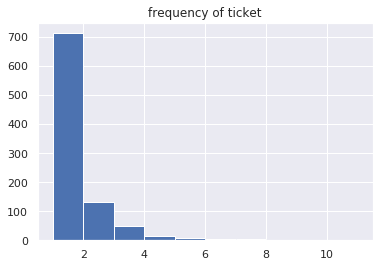

In [52]:
# Ticketの頻度のヒストグラム
plt.hist(alldata.Ticket.value_counts())
plt.title('frequency of ticket')

In [56]:
# Ticket頻度別の生存率
alldata.loc[:, 'TicketFreq'] = alldata.groupby(['Ticket'])['PassengerId'].transform('count')
alldata.query('train_or_test == "train"').groupby(['TicketFreq'])['Survived'].agg(['mean','count'])

,mean,count
TicketFreq,,
1,0.270270,481
2,0.513812,181
3,0.653465,101
4,0.727273,44
5,0.333333,21
6,0.210526,19
7,0.208333,24
8,0.384615,13
11,0.000000,7
